In [35]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")


In [ ]:

df = pd.read_csv("ToyotaCorolla - MLR.csv")
df.head()


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:

df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

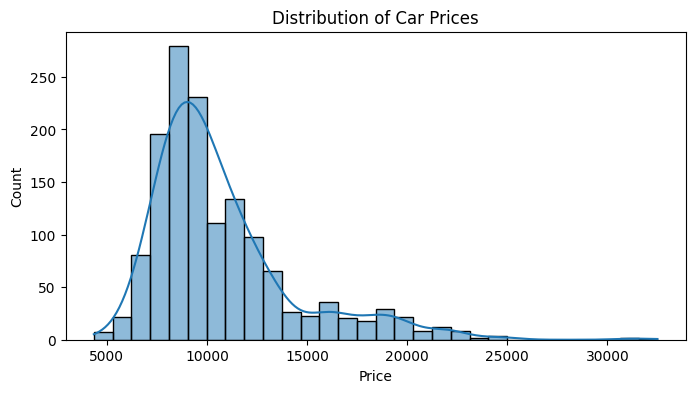

In [ ]:
# Exploratory Data Analysis

plt.figure(figsize=(8, 4))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.show()





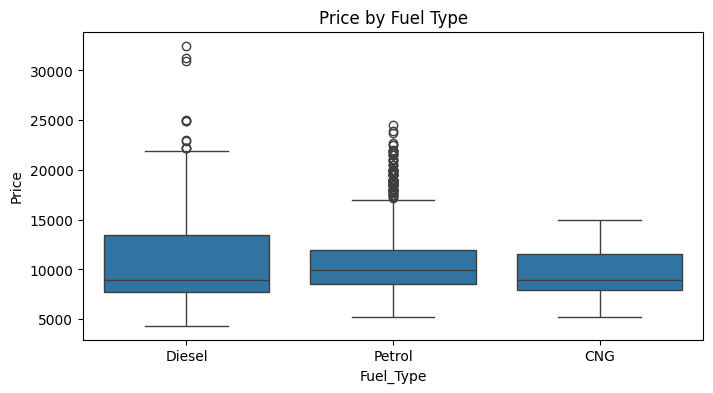

In [ ]:

plt.figure(figsize=(8, 4))
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title("Price by Fuel Type")
plt.show()

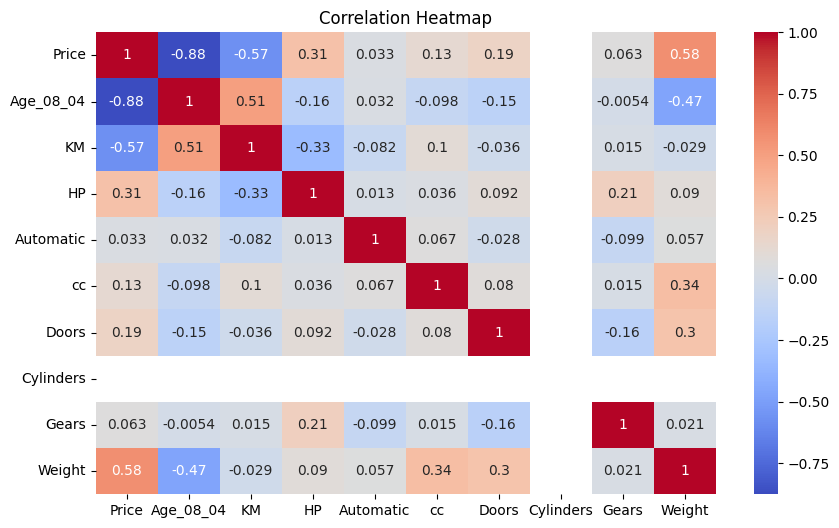

In [ ]:

plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:


# Encode categorical variable
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Define features and target
X = df.drop(['Price'], axis=1)
y = df['Price']


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Model 1: Basic Linear Regression
model1 = LinearRegression()
model1.fit(X_train_scaled, y_train)
y_pred1 = model1.predict(X_test_scaled)

# Model 2: Lasso Regression
model2 = Lasso(alpha=1.0)
model2.fit(X_train_scaled, y_train)
y_pred2 = model2.predict(X_test_scaled)

# Model 3: Ridge Regression
model3 = Ridge(alpha=1.0)
model3.fit(X_train_scaled, y_train)
y_pred3 = model3.predict(X_test_scaled)


In [ ]:
# Evaluation 
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name}")
    print("R² Score:", r2_score(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("-" * 30)

evaluate_model(y_test, y_pred1, "Linear Regression")
evaluate_model(y_test, y_pred2, "Lasso Regression")
evaluate_model(y_test, y_pred3, "Ridge Regression")


📌 Linear Regression
R² Score: 0.8348888040611081
RMSE: 1484.265415329652
------------------------------
📌 Lasso Regression
R² Score: 0.8351178206648817
RMSE: 1483.2356869216203
------------------------------
📌 Ridge Regression
R² Score: 0.8350462635431564
RMSE: 1483.5575063081635
------------------------------


In [46]:
# Coefficients for model1 (Linear Regression)
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model1.coef_
})
coeff_df.sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient
8,Weight,1.316818e+03
10,Fuel_Type_Petrol,4.580477e+02
2,HP,2.083499e+02
7,Gears,1.093404e+02
3,Automatic,3.439713e+01
6,Cylinders,1.421085e-13
4,cc,-1.416192e+01
9,Fuel_Type_Diesel,-2.172217e+01
5,Doors,-5.746780e+01
1,KM,-6.116544e+02


In [47]:
# Assumptions:
# 1. Linear relationship exists between independent and dependent variables
# 2. No perfect multicollinearity
# 3. Residuals are normally distributed (not checked here)
# 4. We assumed standardization is required for regression-based models

# Multicollinearity can be addressed using Ridge or Lasso, which we applied


### 1. What is Normalization & Standardization and how is it helpful?

**Normalization**  
- Normalization is the process of scaling data into a fixed range, usually **[0,1]** or **[-1,1]**.  
- Formula (Min-Max Scaling):  
  \[
  X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}
  \]
- Useful when features have very different scales and we want to bring them into a comparable range.  
- Mostly applied when we don’t assume data distribution (e.g., Neural Networks, KNN).  

**Standardization**  
- Standardization transforms data so that it has a **mean = 0** and **standard deviation = 1**.  
- Formula (Z-score scaling):  
  \[
  X_{std} = \frac{X - \mu}{\sigma}
  \]
- Useful when data follows a Gaussian-like distribution.  
- Mostly used in models that assume normal distribution (e.g., Linear Regression, Logistic Regression, SVM, PCA).  

**How it helps:**  
- Improves model training speed.  
- Avoids domination of large-scale features over small-scale ones.  
- Ensures fair weight distribution in distance-based algorithms.  

---

### 2. What techniques can be used to address multicollinearity in multiple linear regression?

Multicollinearity occurs when two or more independent variables are highly correlated, making it difficult to estimate their individual effects.  

**Techniques to handle multicollinearity:**  
1. **Remove highly correlated predictors** – Drop one of the variables with high correlation.  
2. **Variance Inflation Factor (VIF)** – Calculate VIF and remove variables with VIF > 10.  
3. **Principal Component Analysis (PCA)** – Reduce dimensionality and create uncorrelated components.  
4. **Regularization techniques** – Use Ridge Regression or Lasso Regression to penalize and reduce the impact of correlated predictors.  
5. **Domain knowledge** – Select the most meaningful variable if two features are redundant.  

